Chapter 19

# 炮弹角度优化
Book_3《数学要素》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码以抛体运动的物理模型为基础，计算并可视化了不同发射角度下物体的运动轨迹、射程和最大高度，并分析了射程随角度变化的规律。以下从数学角度详细描述每部分功能及其公式。

---

### 1. **物理背景与模型公式**

物体以初速度 $v_0$ 和发射角度 $\theta$ 相对水平地面发射，其运动遵循经典力学中的抛体运动公式。已知重力加速度为 $g$，发射角 $\theta$ 的水平和竖直分速度分别为：
$$
v_x = v_0 \cos\theta, \quad v_y = v_0 \sin\theta
$$

根据时间 $t$，物体的水平位移和垂直位移为：
$$
x(t) = v_0 \cos\theta \cdot t
$$
$$
y(t) = v_0 \sin\theta \cdot t - \frac{1}{2} g t^2
$$

物体的运动持续到落地为止，落地时 $y = 0$，总飞行时间 $t_\text{flight}$ 可通过解竖直方向的运动方程得到：
$$
t_\text{flight} = \frac{2 v_0 \sin\theta}{g}
$$

射程（物体落地点的水平距离）为：
$$
R = x(t_\text{flight}) = \frac{v_0^2 \sin(2\theta)}{g}
$$

最大高度出现在竖直速度 $v_y = 0$ 时，对应的时间为 $t_\text{max\_height} = \frac{v_0 \sin\theta}{g}$，此时的高度为：
$$
H = y(t_\text{max\_height}) = \frac{v_0^2 \sin^2\theta}{2g}
$$

---

### 2. **轨迹计算与可视化**

#### 轨迹函数 `calculate_trajectory`
通过输入角度 $\theta$，函数计算抛体的水平位移 $x(t)$ 和垂直位移 $y(t)$。时间被均匀分割为 100 个间隔，生成物体的完整运动轨迹：
- $x(t)$ 描述水平运动；
- $y(t)$ 描述竖直运动，受重力影响呈抛物线。

可视化中，代码绘制了不同角度 $\theta \in [10^\circ, 85^\circ]$ 下的轨迹，使用 HSV 色彩映射将各轨迹区分，并标记轨迹对应的发射角度。

#### 射程与最大高度计算
使用函数 `calculate_range_and_height`，对每个发射角度 $\theta$，分别计算射程 $R$ 和最大高度 $H$：
- $R = \frac{v_0^2 \sin(2\theta)}{g}$；
- $H = \frac{v_0^2 \sin^2\theta}{2g}$。

射程和最大高度被保存以便后续分析。

---

### 3. **射程随角度的变化**

射程 $R$ 是发射角 $\theta$ 的函数，其最大值出现在 $\theta = 45^\circ$，此时：
$$
R_\text{max} = \frac{v_0^2}{g}
$$

代码通过可视化展示了射程随角度变化的趋势，并用散点标记各角度对应的射程。通过绘图直观显示：
- $\theta < 45^\circ$ 时，射程随着角度增加而增大；
- $\theta > 45^\circ$ 时，射程随着角度增加而减小。

---

### 4. **可视化解读**

#### 轨迹图
轨迹图直观地显示了物体在不同发射角度下的运动轨迹：
- 随着角度 $\theta$ 的增加，轨迹的最大高度 $H$ 和射程 $R$ 发生显著变化；
- 低角度（例如 $10^\circ$）的轨迹更加平坦，高角度（例如 $80^\circ$）的轨迹更加陡峭。

#### 射程随角度变化图
射程随角度变化的图表展示了发射角 $\theta$ 对射程 $R$ 的影响：
- $\theta = 45^\circ$ 对应的射程最大；
- 两侧对称的下降趋势反映了抛体运动的对称性。

---

### 总结

这段代码通过经典物理公式对抛体运动进行数值模拟与可视化，从多角度分析了发射角度对运动轨迹、射程和最大高度的影响。通过动态轨迹展示和射程随角度的关系曲线，可以清晰理解抛体运动的物理特性，是对基础力学概念的生动演示。

## 导入包

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import hsv

In [2]:
p = plt.rcParams  # 获取默认绘图参数
p["font.sans-serif"] = ["Roboto"]  # 设置无衬线字体为 Roboto
p["font.weight"] = "light"  # 设置字体粗细为 light
p["ytick.minor.visible"] = True  # 显示 y 轴的小刻度
p["xtick.minor.visible"] = True  # 显示 x 轴的小刻度
p["axes.grid"] = True  # 启用坐标轴网格
p["grid.color"] = "0.5"  # 设置网格颜色为灰色
p["grid.linewidth"] = 0.5  # 设置网格线宽度

## 参数定义

In [3]:
g = 9.8  # 重力加速度 (m/s^2)
v0 = 50  # 初速度 (m/s)
# angles = np.arange(10, 80, 2)  # 比较的发射角度 (°)
angles = np.arange(10, 85, 5)  # 比较的发射角度 (°)
time_intervals = 100  # 时间步数

## 计算轨迹函数

In [4]:
def calculate_trajectory(angle):
    """
    计算给定角度的运动轨迹 (x, y)
    参数:
    angle - 发射角度 (°)
    返回:
    x, y - 运动轨迹的坐标
    """
    theta = np.radians(angle)  # 转换为弧度
    t_flight = 2 * v0 * np.sin(theta) / g  # 总飞行时间
    t = np.linspace(0, t_flight, time_intervals)  # 时间分段
    x = v0 * np.cos(theta) * t  # 水平位移
    y = v0 * np.sin(theta) * t - 0.5 * g * t**2  # 垂直位移
    return x, y

## 计算射程和最大高度函数

In [5]:
def calculate_range_and_height(angle):
    """
    计算射程和最大高度
    参数:
    angle - 发射角度 (°)
    返回:
    射程, 最大高度
    """
    theta = np.radians(angle)
    R = (v0**2 * np.sin(2 * theta)) / g  # 射程
    H = (v0**2 * np.sin(theta)**2) / (2 * g)  # 最大高度
    return R, H

In [6]:
# HSV颜色映射
cmap = hsv
colors = cmap(np.linspace(0, 1, len(angles)))

In [7]:
# 保存结果
ranges = []
heights = []

## 绘制不同角度的轨迹

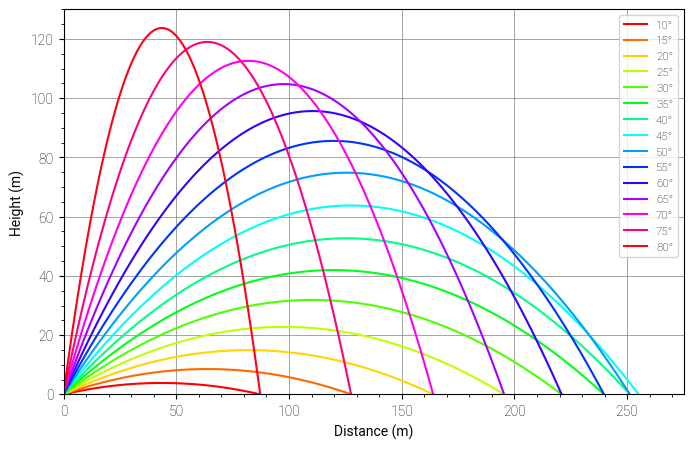

In [8]:
plt.figure(figsize=(8, 5))
for angle, color in zip(angles, colors):
    x, y = calculate_trajectory(angle)
    plt.plot(x, y, color=color, label=f"{angle}°")
    R, H = calculate_range_and_height(angle)
    ranges.append(R)
    heights.append(H)

# 添加轨迹图示
plt.xlabel("Distance (m)")
plt.ylabel("Height (m)")
plt.legend(loc='upper right', fontsize='small')
plt.xlim(0,275)
plt.ylim(0,130)
plt.grid(True)
plt.show()

## 绘制射程随角度变化

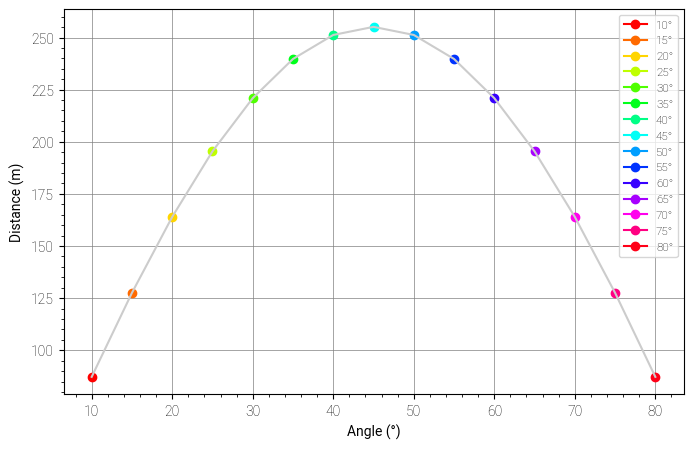

In [9]:
plt.figure(figsize=(8, 5))
for angle, range_, color in zip(angles, ranges, colors):
    plt.plot(angle, range_, marker='o', color=color, label=f"{angle}°")

plt.plot(angles, ranges, color = '0.8')
plt.xlabel("Angle (°)")
plt.ylabel("Distance (m)")
plt.grid(True)
plt.legend(loc='upper right', fontsize='small')
plt.show()